In [91]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [92]:
df1 = pd.read_csv("llcs/League of Legends Champion Stats 12.2.csv", delimiter=";")
df2 = pd.read_csv("llcs/League of Legends Champion Stats 12.1.csv", delimiter=";")
df3 = pd.read_csv("llcs/League of Legends Champion Stats 12.3.csv", delimiter=";")

In [93]:
final_df = df1.append(df2)
final_df = final_df.append(df3)

/tmp/ipykernel_4539/1402871959.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = df1.append(df2)
/tmp/ipykernel_4539/1402871959.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df3)


In [94]:
final_df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97%,94.09%,4.33%,1.97%,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71%,93.24%,4.56%,1.04%,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70%,44.38%,6.19%,21.71%,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85%,55.40%,8.26%,21.71%,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94%,59.70%,4.86%,23.10%,2.28


In [95]:
def divider():
    print("*-----------------------------------------------*")

In [96]:
divider()
print(f"Dataset contains {final_df.shape[0]} of rows and {final_df.shape[1]} of columns.")

*-----------------------------------------------*
Dataset contains 704 of rows and 11 of columns.


In [97]:
divider()
print(f'Dataset contains {len(list(final_df.select_dtypes(include=["category", "object"])))} Textual Columns.')
print(f'Dataset contains {len(list(final_df.select_dtypes(include=["int", "float"])))} Numerical Columns.')

*-----------------------------------------------*
Dataset contains 8 Textual Columns.
Dataset contains 3 Numerical Columns.


In [98]:
divider()
print(f"Dataset contains {final_df.isnull().sum().sum()} values.")

*-----------------------------------------------*
Dataset contains 1 values.


In [99]:
final_df[final_df["Class"].isnull()]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
93,Lillia,NaN,TOP,D,24.34,-9.25,49.20%,11.49%,0.40%,1.01%,1.96


In [100]:
final_df.dropna(inplace=True)

In [101]:
final_df[final_df["Class"].isnull()]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA


In [102]:
final_df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 237
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    703 non-null    object 
 1   Class   703 non-null    object 
 2   Role    703 non-null    object 
 3   Tier    703 non-null    object 
 4   Score   703 non-null    float64
 5   Trend   703 non-null    float64
 6   Win %   703 non-null    object 
 7   Role %  703 non-null    object 
 8   Pick %  703 non-null    object 
 9   Ban %   703 non-null    object 
 10  KDA     703 non-null    float64
dtypes: float64(3), object(8)
memory usage: 65.9+ KB


In [104]:
final_df.describe()

,Score,Trend,KDA
count,703.000000,703.000000,703.000000
mean,50.036686,-0.093087,2.325690
std,16.824257,6.592165,0.412005
min,7.090000,-38.030000,1.410000
25%,38.800000,-2.895000,2.040000
50%,46.680000,-0.230000,2.310000
75%,59.870000,2.475000,2.540000
max,95.220000,44.710000,4.140000


In [105]:
final_df.nunique()

Name      158
Class       6
Role        5
Tier        6
Score     658
Trend     565
Win %     431
Role %    664
Pick %    482
Ban %     386
KDA       181
dtype: int64

In [106]:
divider()
print(f"Dataset contains {len(final_df['Class'].unique())} different classes.")
print(f"Dataset contains {len(final_df['Role'].unique())} different roles.")
print(f"Dataset contains {len(final_df['Tier'].unique())} different tiers.")

*-----------------------------------------------*
Dataset contains 6 different classes.
Dataset contains 5 different roles.
Dataset contains 6 different tiers.


In [107]:
final_df['Trend'] = final_df['Trend'].astype('float')
final_df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97%,94.09%,4.33%,1.97%,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71%,93.24%,4.56%,1.04%,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70%,44.38%,6.19%,21.71%,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85%,55.40%,8.26%,21.71%,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94%,59.70%,4.86%,23.10%,2.28


In [108]:
final_df['Win %'] = final_df['Win %'].str.replace("%", "").astype("float")
final_df['Role %'] = final_df['Role %'].str.replace("%", "").astype("float")
final_df['Pick %'] = final_df['Pick %'].str.replace("%", "").astype("float")
final_df['Ban %'] = final_df['Ban %'].str.replace("%", "").astype("float")

In [109]:
final_df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97,94.09,4.33,1.97,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71,93.24,4.56,1.04,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70,44.38,6.19,21.71,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85,55.40,8.26,21.71,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94,59.70,4.86,23.10,2.28


In [110]:
final_df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

In [133]:
final_df[final_df.duplicated()]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA


Text(0, 0.5, 'Classes')

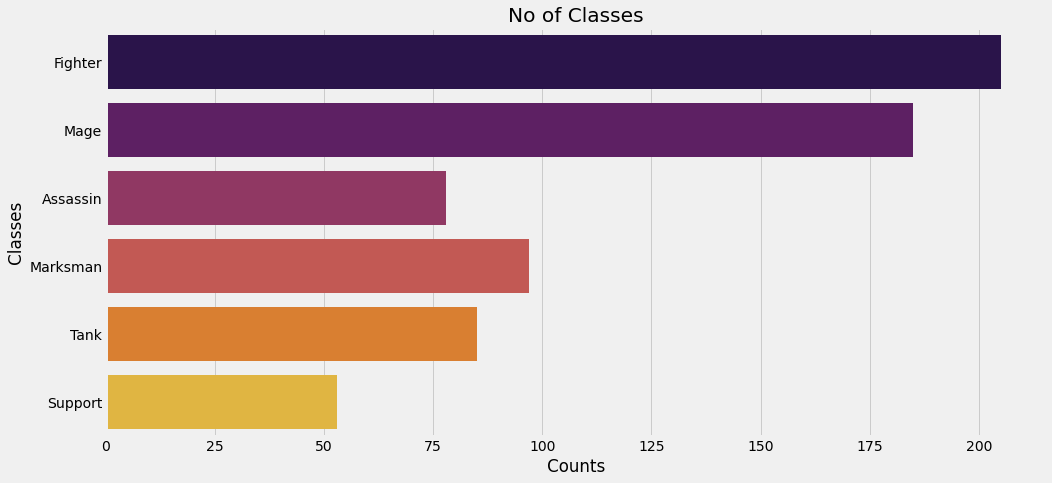

In [115]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Class", data=final_df, palette="inferno")
plt.title("No of Classes")
plt.xlabel("Counts")
plt.ylabel("Classes")

## Observation
1. Fighter Class has more entries.

Text(0, 0.5, 'Classes')

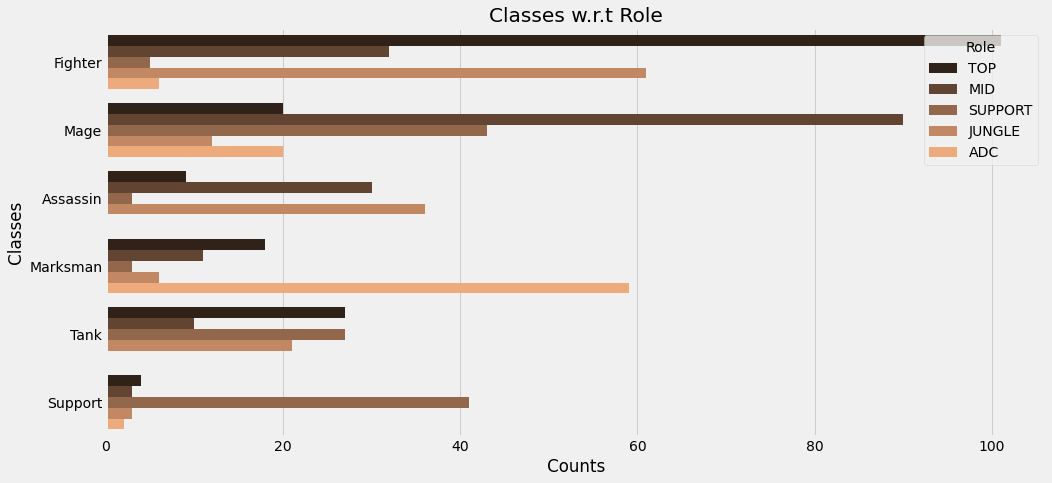

In [116]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Class", data=final_df, hue="Role", palette="copper")
plt.title("Classes w.r.t Role")
plt.xlabel("Counts")
plt.ylabel("Classes")

## Observation
Fighter Class have Maximum reflections of TOP Role.

Text(0, 0.5, 'Classes')

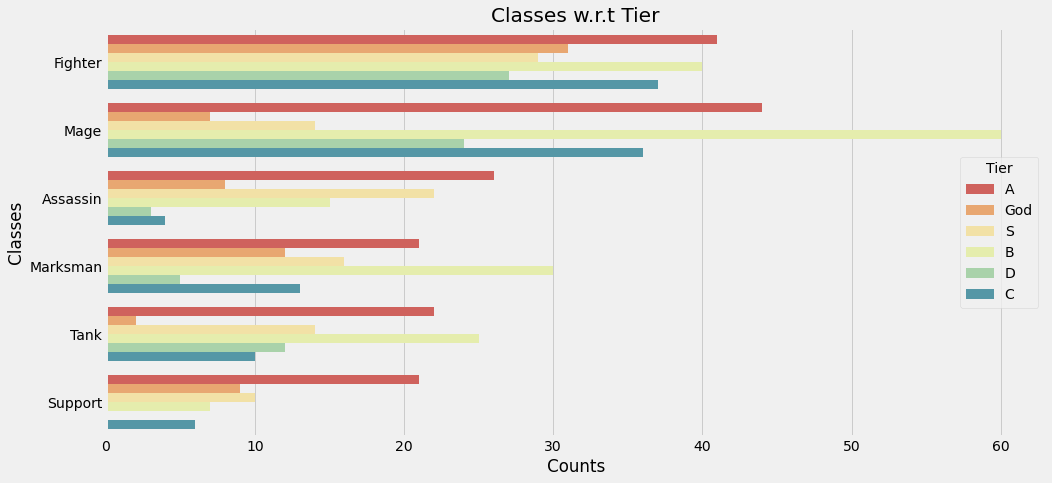

In [117]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Class", data=final_df, hue="Tier", palette="Spectral")
plt.title("Classes w.r.t Tier")
plt.xlabel("Counts")
plt.ylabel("Classes")

## Observation
Mage Class have maviumum reflections of B Tier.

In [118]:
final_df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97,94.09,4.33,1.97,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71,93.24,4.56,1.04,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70,44.38,6.19,21.71,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85,55.40,8.26,21.71,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94,59.70,4.86,23.10,2.28


Text(0, 0.5, 'Tiers')

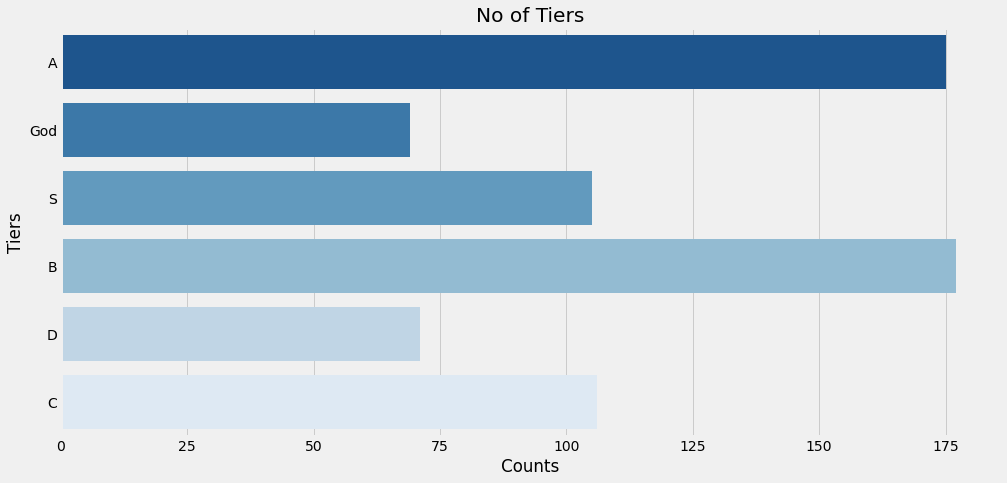

In [120]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Tier", data=final_df, palette="Blues_r")
plt.title("No of Tiers")
plt.xlabel("Counts")
plt.ylabel("Tiers")

## Observation
B Tier have more reflections in dataset.

Text(0, 0.5, 'Roles')

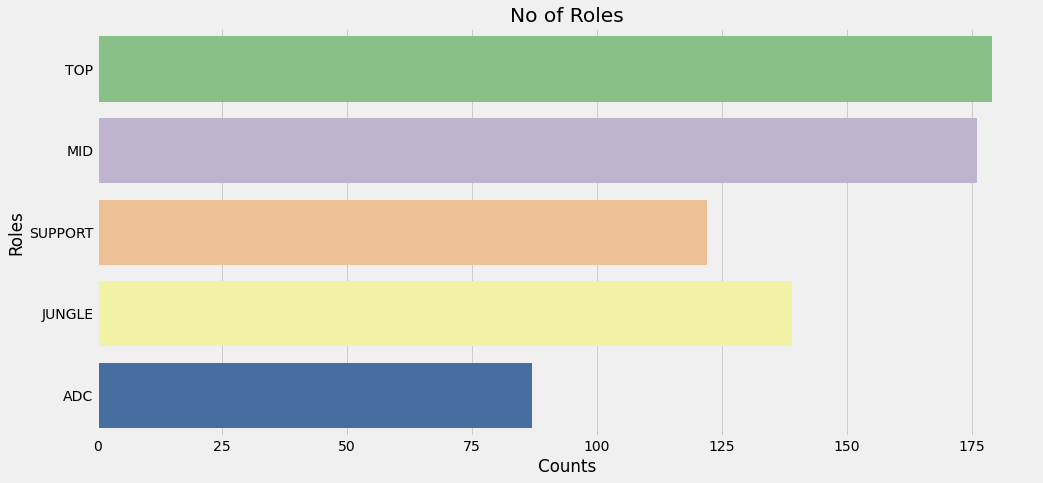

In [121]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Role", data=final_df, palette="Accent")
plt.title("No of Roles")
plt.xlabel("Counts")
plt.ylabel("Roles")

## Observation
TOP Role have more reflections in dataset.

<AxesSubplot:xlabel='KDA', ylabel='Class'>

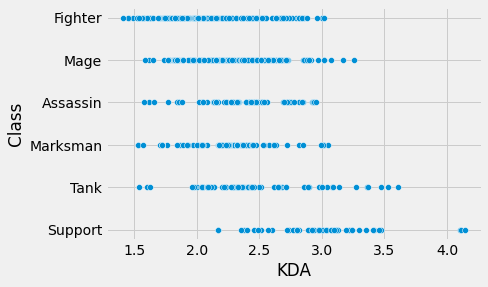

In [130]:
sns.scatterplot(x='KDA', y="Class", data=final_df)

## Observation
1. From this chart of KDA we can see that most of the players uses heroes of Class Fighter and Mage.
2. Support Classes has more KDA than others.

In [137]:
divider()
print(f"Dataset have data of {len(list(final_df['Name'].unique()))} players.")

*-----------------------------------------------*
Dataset have data of 158 players.


Text(0.5, 1.0, 'Class vs KDA')

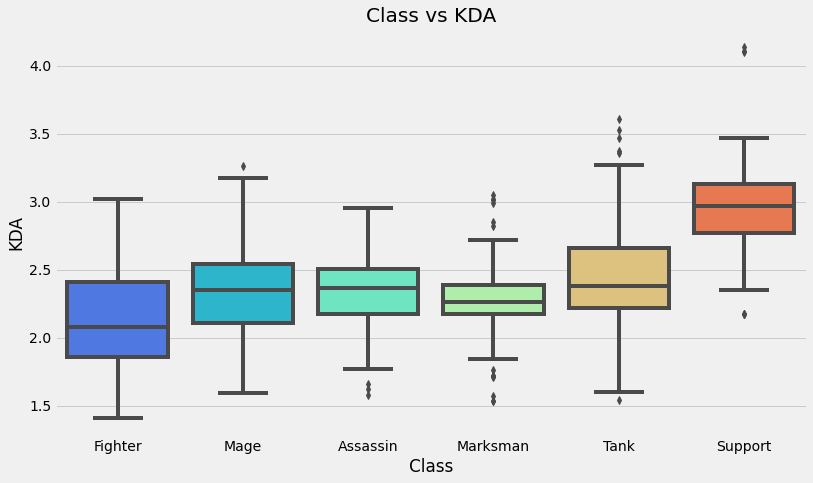

In [141]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Class", y="KDA", data=final_df, palette="rainbow")
plt.title("Class vs KDA")

Text(0.5, 1.0, 'Tier vs KDA')

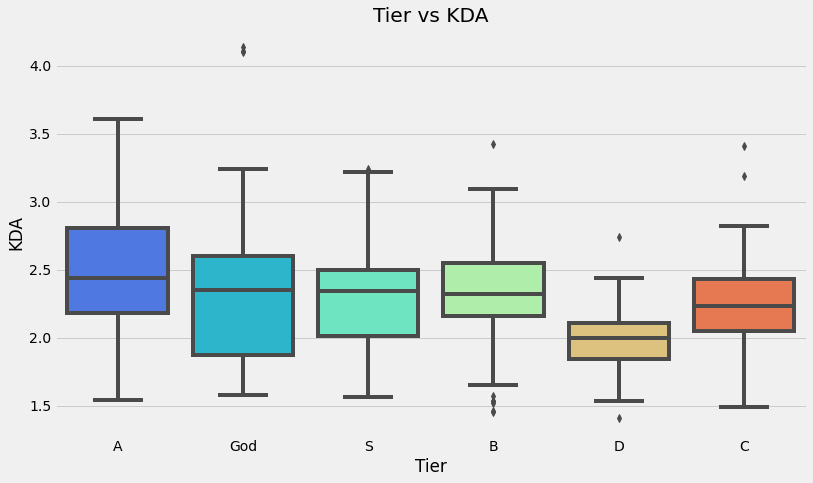

In [142]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Tier", y="KDA", data=final_df, palette="rainbow")
plt.title("Tier vs KDA")

Text(0.5, 1.0, 'Role vs KDA')

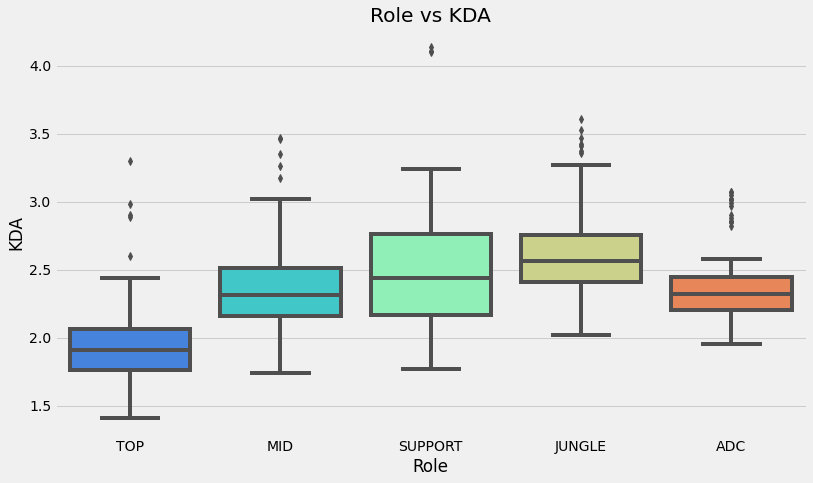

In [144]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Role", y="KDA", data=final_df, palette="rainbow")
plt.title("Role vs KDA")

## Observations
1. Most poeple uses Fighter Class Heroes.
2. Most People is at Tier A.
3. Most People is at Support Role.

In [145]:
final_df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97,94.09,4.33,1.97,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71,93.24,4.56,1.04,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70,44.38,6.19,21.71,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85,55.40,8.26,21.71,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94,59.70,4.86,23.10,2.28


Text(0.5, 1.0, 'Score(%) vs KDA')

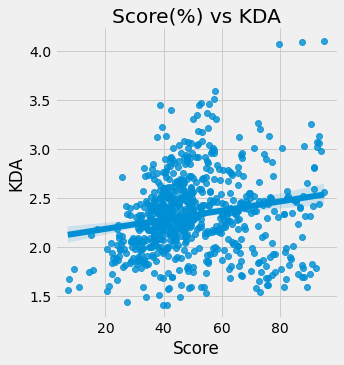

In [155]:
sns.lmplot(x="Score", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Score(%) vs KDA")

Text(0.5, 1.0, 'Trend(%) vs KDA')

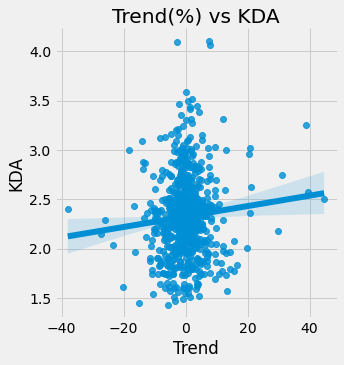

In [156]:
sns.lmplot(x="Trend", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Trend(%) vs KDA")

Text(0.5, 1.0, 'Win(%) vs KDA')

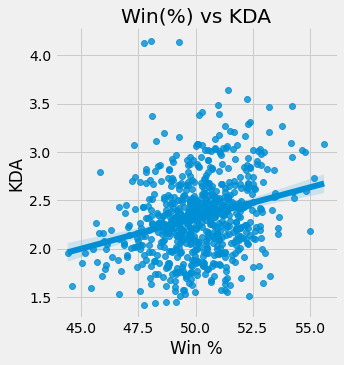

In [158]:
sns.lmplot(x="Win %", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Win(%) vs KDA")

Text(0.5, 1.0, 'Role(%) vs KDA')

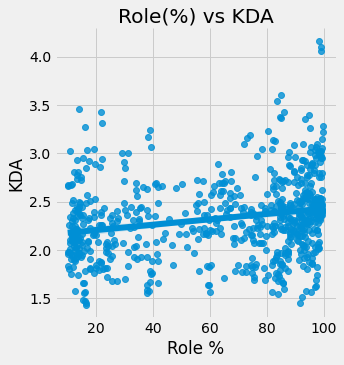

In [159]:
sns.lmplot(x="Role %", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Role(%) vs KDA")

Text(0.5, 1.0, 'Pick(%) vs KDA')

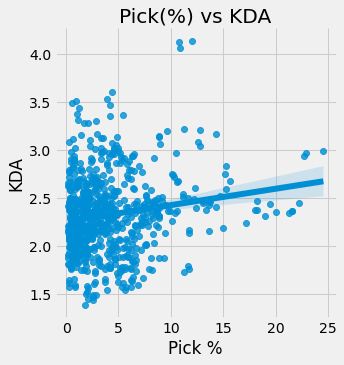

In [161]:
sns.lmplot(x="Pick %", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Pick(%) vs KDA")

Text(0.5, 1.0, 'Ban(%) vs KDA')

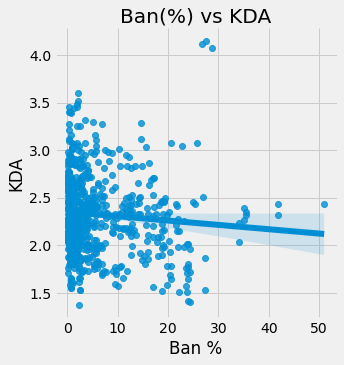

In [162]:
sns.lmplot(x="Ban %", y="KDA", y_jitter=.05, data=final_df, palette="muted")
plt.title("Ban(%) vs KDA")

In [170]:
cleaned_df = final_df.drop("Name", axis=1)

In [171]:
cleaned_df.head()

,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Fighter,TOP,A,55.11,-3.14,48.97,94.09,4.33,1.97,1.92
1,Mage,MID,A,55.85,2.64,50.71,93.24,4.56,1.04,2.55
2,Assassin,TOP,God,87.73,29.87,49.70,44.38,6.19,21.71,2.13
3,Assassin,MID,S,74.58,9.28,49.85,55.40,8.26,21.71,2.42
4,Marksman,MID,S,63.49,3.64,51.94,59.70,4.86,23.10,2.28


### Q.1 
What is the maximum Score, KDA, Win%, Role%, Pick%, Ban% of Fighter Class Hero?

In [174]:
maxKDA = cleaned_df["KDA"][cleaned_df["Class"]=="Fighter"].max()
maxWin = cleaned_df["Win %"][cleaned_df["Class"]=="Fighter"].max()
maxRole = cleaned_df["Role %"][cleaned_df["Class"]=="Fighter"].max()
maxPick = cleaned_df["Pick %"][cleaned_df["Class"]=="Fighter"].max()
maxBan = cleaned_df["Ban %"][cleaned_df["Class"]=="Fighter"].max()

divider()
print("Fighter Class:")
print(f"Maximum KDA: {maxKDA}")
print(f"Maximum Win%: {maxWin}%.")
print(f"Maximum Role%: {maxRole}%.")
print(f"Maximum Pick%: {maxPick}%.")
print(f"Maximum Ban%: {maxBan}%.")

*-----------------------------------------------*
Fighter Class:
Maximum KDA: 3.02
Maximum Win%: 55.14%.
Maximum Role%: 99.35%.
Maximum Pick%: 15.62%.
Maximum Ban%: 24.41%.


### Q2.
Which class, tier, role have maximum KDA?

In [176]:
maxQuans = cleaned_df[['Class', 'Role', 'Tier']][cleaned_df['KDA'] == cleaned_df['KDA'].max()]

In [179]:
divider()
print(f"{maxQuans.values[0][0]} Class have Max KDA.")
print(f"{maxQuans.values[0][1]} Role have Max KDA.")
print(f"{maxQuans.values[0][2]} Tier have Max KDA.")

*-----------------------------------------------*
Support Class have Max KDA.
SUPPORT Role have Max KDA.
God Tier have Max KDA.


### Q2.
Which class, tier, role have minimum KDA?

In [180]:
minQuans = cleaned_df[['Class', 'Role', 'Tier']][cleaned_df['KDA'] == cleaned_df['KDA'].min()]

In [182]:
divider()
print(f"{minQuans.values[0][0]} Class have Min KDA.")
print(f"{minQuans.values[0][1]} Role have Min KDA.")
print(f"{minQuans.values[0][2]} Tier have Min KDA.")

*-----------------------------------------------*
Fighter Class have Min KDA.
TOP Role have Min KDA.
D Tier have Min KDA.


### Q3.
Which class, tier, role have maximum Win%?

In [183]:
maxPer = cleaned_df[['Class', 'Role', 'Tier']][cleaned_df['Win %'] == cleaned_df['Win %'].max()]

In [184]:
divider()
print(f"{maxPer.values[0][0]} Class have Max Win%.")
print(f"{maxPer.values[0][1]} Role have Max Win%.")
print(f"{maxPer.values[0][2]} Tier have Max Win%.")

*-----------------------------------------------*
Support Class have Max Win%.
ADC Role have Max Win%.
A Tier have Max Win%.


### Q3.
Which class, tier, role have minimum Win%?

In [186]:
minPer = cleaned_df[['Class', 'Role', 'Tier']][cleaned_df['Win %'] == cleaned_df['Win %'].min()]

In [187]:
divider()
print(f"{minPer.values[0][0]} Class have Min Win%.")
print(f"{minPer.values[0][1]} Role have Min Win%.")
print(f"{minPer.values[0][2]} Tier have Min Win%.")

*-----------------------------------------------*
Tank Class have Min Win%.
SUPPORT Role have Min Win%.
D Tier have Min Win%.
